<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Analysis-and-Model-training" data-toc-modified-id="Analysis-and-Model-training-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Analysis and Model training</a></span></li><li><span><a href="#Imbalance-control" data-toc-modified-id="Imbalance-control-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imbalance control</a></span></li><li><span><a href="#Model-testing" data-toc-modified-id="ТModel-testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model testing</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Customer Attrition Prediction

Goal: develop a machine learning algorithm for customer attrition prediction analysis. 

Requirements: f1-score not less than 0.59 for the test set. 

## Data Preparation

Upload the data and the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/datasets/Churn.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Check for missing values

In [7]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


There are some missing values in feature Tenure. To fill them in, check if there is any linear correlation between Tenure and any other numeric features. If this correlation is found, it can be used to fill in the missing values.                         

In [9]:
df.loc[:, ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,-0.000062,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.013134,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,-0.000062,-0.013134,1.000000,-0.007911,0.011979,0.027232,-0.032178,0.010520
Balance,0.006268,0.028308,-0.007911,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.011979,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.027232,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.032178,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.010520,0.012797,0.014204,-0.009933,-0.011421,1.000000


There is no strong correlation between Tenure and other features. Values if Tenure range from 0 to 10. Fill in missing values with random numbers 0-10. 

In [10]:
df['Tenure'] = df['Tenure'].apply(lambda  x: x if not np.isnan(x) else np.random.randint(0, 11))

Check results of filling in the missing values.

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

For further analysis drop features that are uninformative.

In [12]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

Features Geography and Gender are object type. For using ML algorithms, they shous be transformed to numeric values. Use One Hot Encoding.

In [13]:
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [15]:
features_all = df.drop('Exited', axis=1)
target_all = df['Exited']

Split dataset to train and test sets for final model testing.

In [16]:
features, features_test, target, target_test = train_test_split(
    features_all, target_all, test_size=0.20, random_state=12345, stratify=target_all)

__Summary__

Dataset was uploaded, analysed and prepared for models training and evaluation

## Analysis and Model training

Check for imbalanced dataset 

In [17]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Amount of objects with target = 1 is about 20% of the whole sample. Dataset is imbalanced. 

Split training set to train and validation sets. Ignore imbalanced for now.

In [18]:
features_train_dis, features_valid_dis, target_train_dis, target_valid_dis = train_test_split(
    features, target, test_size=0.25, random_state=12345)

Check size of the sets

In [19]:
print('Training set:', len(features_train_dis), '\n'
     'Test set:', len(features_test), '\n'
     'Validation set:', len(features_valid_dis))

Training set: 6000 
Test set: 2000 
Validation set: 2000


In [20]:
target_valid_dis[target_valid_dis == 1].count()

424

In [21]:
target_valid_dis[target_valid_dis == 0].count()

1576

Try Logistic Regression

In [22]:
model_log_reg = LogisticRegression(random_state=12345)

In [23]:
model_log_reg.fit(features_train_dis, target_train_dis)
predicted_train = model_log_reg.predict(features_train_dis)
predicted_valid = model_log_reg.predict(features_valid_dis)
f1_score_LogisticRegression_train = f1_score(target_train_dis, predicted_train)
f1_score_LogisticRegression_valid = f1_score(target_valid_dis, predicted_valid)
print(f'f1_score LogisticRegression for training set: {f1_score_LogisticRegression_train:.2f}')
print(f'f1_score LogisticRegression for validation set: {f1_score_LogisticRegression_valid:.2f}')

f1_score LogisticRegression for training set: 0.09
f1_score LogisticRegression for validation set: 0.10


In [24]:
probabilities_valid = model_log_reg.predict_proba(features_valid_dis)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid_dis, probabilities_one_valid)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.67


__Summary__

Logistic regression shows low f1-score (0.10) and auc_roc (0.67) for validation set when dataset is imbalanced.

## Imbalance control

Add stratification

In [25]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345, stratify=target)

In [26]:
print('Training set:', len(features_train), '\n'
     'Test set:', len(features_test), '\n'
     'Validation set:', len(features_valid))

Training set: 6000 
Test set: 2000 
Validation set: 2000


In [27]:
target_valid[target_valid == 1].count()

407

In [28]:
target_valid[target_valid == 0].count()

1593

After stratification is added, 1:0 ratio is close to this ratio in original dataset (2037:7963)

In [29]:
model_2_log_reg = LogisticRegression(random_state=12345)
model_2_log_reg.fit(features_train, target_train)
predicted_train = model_2_log_reg.predict(features_train)
predicted_valid = model_2_log_reg.predict(features_valid)
f1_score_LogisticRegression_train = f1_score(target_train, predicted_train)
f1_score_LogisticRegression_valid = f1_score(target_valid, predicted_valid)
print(f'f1_score LogisticRegression for training set:  {f1_score_LogisticRegression_train:.2f}')
print(f'f1_score LogisticRegression for validation set: {f1_score_LogisticRegression_valid:.2f}')

f1_score LogisticRegression for training set:  0.09
f1_score LogisticRegression for validation set: 0.07


In [30]:
probabilities_valid = model_2_log_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.68


Stratification did not improve f1_score. 

Use up- and downsampling

In [31]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [32]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_score_values = f1_score(target_valid, predicted_valid)

print(f'f1_score upsampled for validation set: {f1_score_values:.2f}')

f1_score upsampled for validation set: 0.46


In [33]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc for upsampled = {auc_roc:.2f}')

auc_roc for upsampled = 0.71


In [34]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)       
f1_score_values = f1_score(target_valid, predicted_valid)
print(f'f1_score downsampled for validation set: {f1_score_values:.2f}')

f1_score downsampled for validation set: 0.45


In [35]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc for downsampled = {auc_roc:.2f}')

auc_roc for downsampled = 0.71


Up- and downsampling show significant improvement of f1_score and auc_roc.

Use Scaling

In [36]:
scaler = StandardScaler()
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
scaler.fit(features_train[numeric])

StandardScaler()

In [37]:
features_train[numeric] = scaler.transform(features_train[numeric])

features_valid[numeric] = scaler.transform(features_valid[numeric])

Add class weights

In [38]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [39]:
target_valid[target_valid == 1].count()

424

In [40]:
target_valid[target_valid == 0].count()

1576

In [41]:
model_3_log_reg = LogisticRegression(random_state=12345, class_weight={1: 0.80, 0: 0.20})
model_3_log_reg.fit(features_train, target_train)
predicted_train = model_3_log_reg.predict(features_train)
predicted_valid = model_3_log_reg.predict(features_valid)
f1_score_LogisticRegression_train = f1_score(target_train, predicted_train)
f1_score_LogisticRegression_valid = f1_score(target_valid, predicted_valid)
print(f'f1_score LogisticRegression for training set: {f1_score_LogisticRegression_train:.2f}')
print(f'f1_score LogisticRegression for validation set: {f1_score_LogisticRegression_valid:.2f}')

f1_score LogisticRegression for training set: 0.43
f1_score LogisticRegression for validation set: 0.45


In [42]:
probabilities_valid = model_3_log_reg.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.71


After class weights are added,  f1_score and auc_roc metrics improved. Use random forest to improve further. 

Train RandomForestClassifier with hyper-parameters search.

In [43]:
model_rand_forest = RandomForestClassifier(random_state=12345, class_weight={1: 0.80, 0: 0.20})

Find max tree depth with number of trees = 20. Find max f1_score for validation test.

In [44]:
depth_max=0
f1_max_train=0
f1_max_valid=0
for depth in range(1, 25, 1):
    model_rand_forest = RandomForestClassifier(
        n_estimators=20, max_depth=depth, random_state=12345, class_weight={1: 0.8, 0: 0.2})
    model_rand_forest.fit(features_train, target_train)
    predicted_train = model_rand_forest.predict(features_train)
    predicted_valid = model_rand_forest.predict(features_valid)
    f1_score_RandomForestClassifier= f1_score(target_train, predicted_train)
    f1_score_RandomForestClassifier_valid= f1_score(target_valid, predicted_valid)

    print(f'depth:{depth}, f1_train:{f1_score_RandomForestClassifier :.2f}, f1_valid:{f1_score_RandomForestClassifier_valid :.2f}')
    if f1_score_RandomForestClassifier_valid > f1_max_valid:
        f1_max_valid = f1_score_RandomForestClassifier_valid
        depth_max = depth
        f1_train = f1_score_RandomForestClassifier
print()        
print("Optimal tree depth with 20 trees:")        
print(f'depth:{depth_max}, f1_train:{f1_score_RandomForestClassifier :.2f}, f1_valid:{f1_score_RandomForestClassifier_valid :.2f}')   

depth:1, f1_train:0.53, f1_valid:0.55
depth:2, f1_train:0.55, f1_valid:0.57
depth:3, f1_train:0.57, f1_valid:0.60
depth:4, f1_train:0.59, f1_valid:0.60
depth:5, f1_train:0.60, f1_valid:0.62
depth:6, f1_train:0.63, f1_valid:0.60
depth:7, f1_train:0.67, f1_valid:0.61
depth:8, f1_train:0.70, f1_valid:0.62
depth:9, f1_train:0.75, f1_valid:0.61
depth:10, f1_train:0.80, f1_valid:0.59
depth:11, f1_train:0.84, f1_valid:0.59
depth:12, f1_train:0.89, f1_valid:0.57
depth:13, f1_train:0.93, f1_valid:0.58
depth:14, f1_train:0.96, f1_valid:0.56
depth:15, f1_train:0.98, f1_valid:0.57
depth:16, f1_train:0.98, f1_valid:0.57
depth:17, f1_train:0.98, f1_valid:0.55
depth:18, f1_train:0.98, f1_valid:0.53
depth:19, f1_train:0.99, f1_valid:0.51
depth:20, f1_train:0.98, f1_valid:0.54
depth:21, f1_train:0.98, f1_valid:0.53
depth:22, f1_train:0.99, f1_valid:0.53
depth:23, f1_train:0.99, f1_valid:0.52
depth:24, f1_train:0.99, f1_valid:0.52

Optimal tree depth with 20 trees:
depth:5, f1_train:0.99, f1_valid:0.52


In [45]:
model_rand_forest = RandomForestClassifier(n_estimators=70, 
    max_depth=5, random_state=12345, class_weight={1: 0.8, 0: 0.2})
model_rand_forest.fit(features_train, target_train)
predicted_train = model_rand_forest.predict(features_train)
predicted_valid = model_rand_forest.predict(features_valid)
f1_score_RandomForestClassifier= f1_score(target_train, predicted_train)
f1_score_RandomForestClassifier_valid= f1_score(target_valid, predicted_valid)
print(f'f1_score RandomForestClassifier for training set: {f1_score_RandomForestClassifier:.2f}')
print(f'f1_score RandomForestClassifier for validation set: {f1_score_RandomForestClassifier_valid:.2f}') 

f1_score RandomForestClassifier for training set: 0.62
f1_score RandomForestClassifier for validation set: 0.62


In [46]:
probabilities_valid = model_rand_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.86


 f1_score and auc_roc are improved. Check also precision и recall with various thresholds.

In [47]:
probabilities_valid

array([[0.47177502, 0.52822498],
       [0.74803829, 0.25196171],
       [0.71775571, 0.28224429],
       ...,
       [0.81638529, 0.18361471],
       [0.5753335 , 0.4246665 ],
       [0.52332142, 0.47667858]])

In [48]:
# A function that outputs information: F1-score
def info_result(y_true, y_pred, model=None): 
    table = classification_report(y_true, y_pred)  
    if model:
        print(f'model :{model}')
    print(f'average_precision_score: {average_precision_score(y_true, y_pred):.2%}')
    print(table)
    print('----')

In [49]:
threshold = 0.1
for i in range(50):
    y_pred = (probabilities_valid[:,1] >= threshold).astype(bool)
    print(y_pred)
    info_result(target_valid, y_pred, model=f'model_log_reg, threshold ={threshold:.2f}')
    threshold += 0.02

[ True  True  True ...  True  True  True]
model :model_log_reg, threshold =0.10
average_precision_score: 21.20%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1576
           1       0.21      1.00      0.35       424

    accuracy                           0.21      2000
   macro avg       0.11      0.50      0.17      2000
weighted avg       0.04      0.21      0.07      2000

----
[ True  True  True ...  True  True  True]
model :model_log_reg, threshold =0.12
average_precision_score: 21.20%
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1576
           1       0.21      1.00      0.35       424

    accuracy                           0.21      2000
   macro avg       0.11      0.50      0.17      2000
weighted avg       0.04      0.21      0.07      2000

----
[ True  True  True ...  True  True  True]
model :model_log_reg, threshold =0.14
average_precision_score: 21.21%


Precision и recall are close with threshold = 0.56

In [50]:
model_rand_forest = RandomForestClassifier(n_estimators=70, 
    max_depth=5, random_state=12345, class_weight={1: 0.8, 0: 0.2})
model_rand_forest.fit(features_train, target_train)

threshold = 0.56

predicted_proba = model_rand_forest.predict_proba(features_valid)
predicted_valid = (predicted_proba [:,1] >= threshold).astype('int')

f1_score_RandomForestClassifier_valid= f1_score(target_valid, predicted_valid)
print(f'f1_score RandomForestClassifier for validation set: {f1_score_RandomForestClassifier_valid:.2f}')

f1_score RandomForestClassifier for validation set: 0.60


In [51]:
probabilities_valid = model_rand_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.86


In [52]:
import sklearn.metrics as metrics
fpr, tpr, threshold = metrics.roc_curve(target_valid, probabilities_one_valid)
roc_auc = metrics.auc(fpr, tpr)

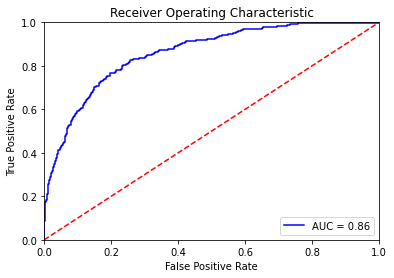

In [53]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

__Summary__

Class weights addition significantly improves f1_score. Stratification does not show significant influence on f1_score. Threshold adjustment does not improve f1_score significantly, but helps precision come nearer to recall.   

## Model testing

In [54]:
predicted_test = model_rand_forest.predict(features_test)
f1_score_RandomForestClassifier_test= f1_score(target_test, predicted_test)
print(f'f1_score RandomForestClassifier for test set: {f1_score_RandomForestClassifier_test:.2f}')

f1_score RandomForestClassifier for test set: 0.63


In [55]:
probabilities_test = model_rand_forest.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)

print(f'auc_roc = {auc_roc:.2f}')

auc_roc = 0.86


__Summary__

Random forest model shows __F1 = 0.63 and auc_roc = 0.86__, for test set. 

## Conclusion

Class weights addition shows the best results in class imbalance control compared to other methods applied. Logistic regression was tested for balanced and imbalanced datasets. Hyper-parameters selection for Random Forest Classifier shows F1 = 0.63 and auc_roc = 0.86, for test set. 